# 01 | Generación de instancias

In [1]:
import pandas as pd
import numpy as np
import os
from random import randint
import matplotlib as plt

In [2]:
ASCII_A = 97
ASCII_Z = 122 

## Generador de instancias con _k_ palabras por letra

In [3]:
def generarArchivoBalanceado(nombreArchivo, largoPalabra, k):
    os.makedirs(F"../data/balanceado/", exist_ok=True)
    pathArchivo = "../data/balanceado/" + nombreArchivo
    archivo = open(pathArchivo, "w")
    for l in range(ASCII_A, ASCII_Z + 1):
        for i in range(k):
            sal = chr(l)
            for lp in np.random.randint(ASCII_A, ASCII_Z, largoPalabra - 1):
                sal += chr(lp)
            archivo.write(sal + "\n")
    return pathArchivo

## Generador de instancias con distribución _Uniforme_

In [4]:
def generarArchivoUniforme(nombreArchivo, largoPalabra, cantidadPalabras):
    os.makedirs(F"../data/", exist_ok=True)
    pathArchivo = "../data/" + nombreArchivo
    archivo = open(pathArchivo, "w")
    sal = ""
    largoPalabra = largoPalabra
    for i in range(cantidadPalabras):
        for lp in range(largoPalabra):
            sal += chr(randint(97, 122))
        archivo.write(sal + "\n")
        sal = ""
    return pathArchivo

## Generador de instancias con distribución _Normal_

In [5]:
def generarArchivoNormal(nombreArchivo, largoPalabra, cantidadPalabras):
    # a b c d e f g h i j k l m 13 n o p q r s t u v w x y z
    mu, sigma = 109.5, 3 #normal( 109.5, 3 ) 
    os.makedirs(F"../data/", exist_ok=True)
    pathArchivo = "../data/" + nombreArchivo
    archivo = open(pathArchivo, "w")
    sal = ""
    largoPalabra = largoPalabra
    for i in range(cantidadPalabras):
        for lp in range(largoPalabra):
            sal += chr(int(np.random.normal()*sigma + mu))
        archivo.write(sal + "\n")
        sal = ""
    archivo.close()
    return pathArchivo

## Instancias utilizadas

### Instancias particulares

In [6]:
generarArchivoUniforme("uniforme-base", 10, 30000)
generarArchivoNormal("normal-base", 10, 26000)

'../data/normal-base'

### Instancias uniformes con cantidad de palabras k = 100, 200, 300, ..., 38500, 39000

In [7]:
MAX_K = 26 * 1500
for k in range(100, MAX_K + 1, 100):
    generarArchivoUniforme("uniforme-" + str(k), 10, k)

### Instancias uniformes

In [8]:
def generarCarpetaUniformes(cantArchivos, cantLetras, cantidadPalabras):
    fileName = "uniforme"
    for i in range(cantArchivos):
        nombre = fileName + str(i)
        generarArchivoUniforme(nombre, cantLetras, cantidadPalabras)

### Instancias normales

In [9]:
def generarCarpetaNormal(cantArchivos, cantLetras, cantidadPalabras):
    fileName = "normal"
    for i in range(cantArchivos):
        nombre = fileName + str(i)
        generarArchivoNormal(nombre, cantLetras, cantidadPalabras)

## Análisis de las instancias

<Axes: >

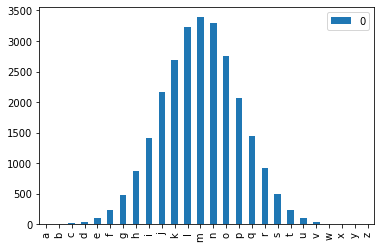

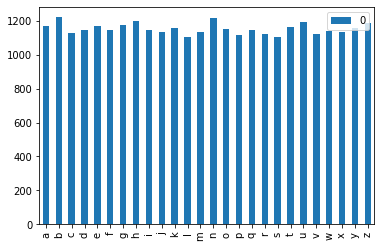

In [10]:
from collections import Counter

# Normal
dataset = pd.read_table("../data/normal-base", header=None)
letters = [w[0] for w in dataset[0].values.tolist()]
letters.sort()
letter_count = Counter(letters)
df = pd.DataFrame.from_dict(letter_count, orient='index')
df.plot(kind='bar')

# Uniforme
dataset = pd.read_table("../data/uniforme-base", header=None)
letters = [w[0] for w in dataset[0].values.tolist()]
letters.sort()
letter_count = Counter(letters)
df = pd.DataFrame.from_dict(letter_count, orient='index')
df.plot(kind='bar')